In [67]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats as stats
import statsmodels.stats.multicomp as mc
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error , r2_score
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd
%matplotlib inline

In [3]:
df = pd.read_csv('/content/project_2_data.csv')

In [4]:
df.drop_duplicates(inplace=True)
df.head(9)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900


In [25]:
# Q1 :
df[['GarageFinish' , 'SalePrice']].dropna(inplace=True)
df.head(9)

<ipython-input-25-1ccbb6a7311e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[['GarageFinish' , 'SalePrice']].dropna(inplace=True)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900


In [68]:
df['GarageFinish'].unique()

array(['RFn', 'Unf', 'Fin', nan], dtype=object)

<ipython-input-69-6ac7c1626a4c>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='GarageFinish', y='SalePrice', data=df , palette='viridis')


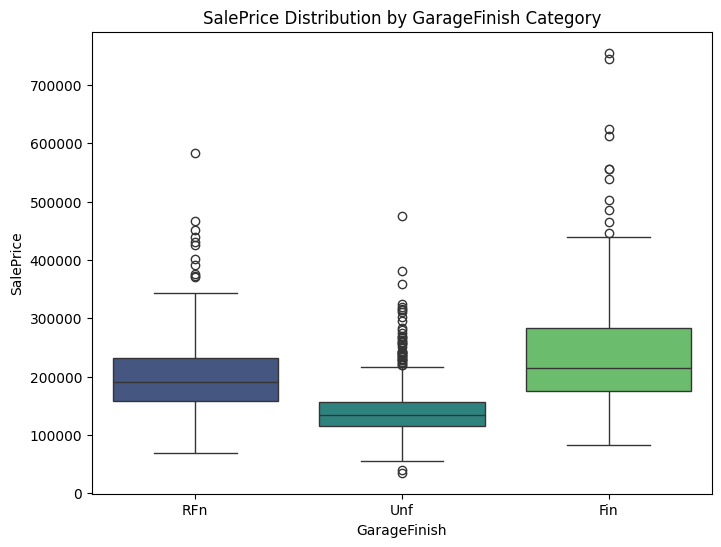

In [69]:
plt.figure(figsize=(8,6))
sns.boxplot(x='GarageFinish', y='SalePrice', data=df , palette='viridis')
plt.xlabel('GarageFinish')
plt.ylabel('SalePrice')
plt.title('SalePrice Distribution by GarageFinish Category')
plt.show()

In [18]:
k_stat, k_pvalue = stats.kruskal(
    df[df['GarageFinish'] == 'RFn']['SalePrice'],
    df[df['GarageFinish'] == 'Unf']['SalePrice'],
    df[df['GarageFinish'] == 'Fin']['SalePrice']
)

k_stat, k_pvalue

(505.2078115404239, 1.9747749828598703e-110)

In [ ]:
columns_dropped = df[['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu']]
clean = df.drop(columns=columns_dropped , inplace= True)
df.head(9)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,0,0,0,0,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,IR1,Lvl,AllPub,Inside,...,0,320,0,0,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,IR1,Lvl,AllPub,Corner,...,228,0,0,0,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,Reg,Lvl,AllPub,Inside,...,205,0,0,0,0,4,2008,WD,Abnorml,129900


In [ ]:
df[['GarageFinish', 'SalePrice']].dropna(inplace=True)
df.head(9)

<ipython-input-92-d29e89298a4a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[['GarageFinish', 'SalePrice']].dropna(inplace=True)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,0,0,0,0,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,IR1,Lvl,AllPub,Inside,...,0,320,0,0,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,IR1,Lvl,AllPub,Corner,...,228,0,0,0,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,Reg,Lvl,AllPub,Inside,...,205,0,0,0,0,4,2008,WD,Abnorml,129900


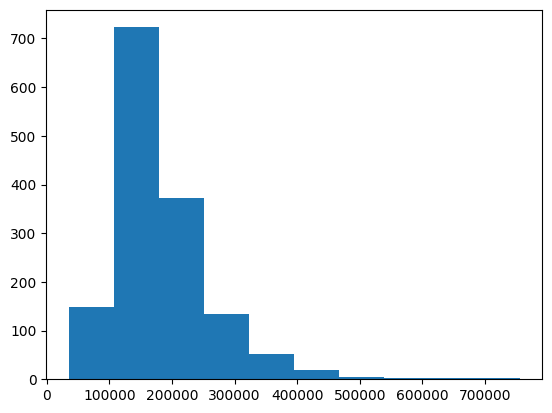

In [ ]:
plt.hist(df['SalePrice'])
plt.show()

In [ ]:
garabysale = df[['GarageFinish' , 'SalePrice']].groupby('GarageFinish').agg([np.mean, np.std, np.size])
garabysale.columns = ['mean' , 'std' , 'size']
garabysale

<ipython-input-94-5d46adbe6dfa>:1: FutureWarning: The provided callable <function mean at 0x780c7cd18310> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  garabysale = df[['GarageFinish' , 'SalePrice']].groupby('GarageFinish').agg([np.mean, np.std, np.size])
<ipython-input-94-5d46adbe6dfa>:1: FutureWarning: The provided callable <function std at 0x780c7cd18430> is currently using SeriesGroupBy.std. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "std" instead.
  garabysale = df[['GarageFinish' , 'SalePrice']].groupby('GarageFinish').agg([np.mean, np.std, np.size])


,mean,std,size
GarageFinish,,,
Fin,240052.690341,96960.593232,352
RFn,202068.869668,63536.222518,422
Unf,142156.423140,46498.528211,605


In [ ]:
fin_mean = garabysale.loc['Fin' , 'mean']
fin_std = garabysale.loc['Fin' , 'std']
numof_fin = garabysale.loc['Fin' , 'size']
se_fin = fin_std / np.sqrt(numof_fin)

RFn_mean = garabysale.loc['RFn' , 'mean']
RFn_std = garabysale.loc['RFn' , 'std']
numof_RFn = garabysale.loc['RFn' , 'size']
se_RFn = RFn_std / np.sqrt(numof_RFn)

Unf_mean = garabysale.loc['Unf' , 'mean']
Unf_std = garabysale.loc['Unf' , 'std']
numof_Unf = garabysale.loc['Unf' , 'size']
se_Unf = Unf_std / np.sqrt(numof_Unf)

print(f"SE Fin =  {se_fin}", f"SE RFn = {se_RFn}", f'SE Unf = {se_Unf} ' , sep='\n')


SE Fin =  5168.016983817639
SE RFn = 3092.894919860191
SE Unf = 1890.433998776949 


In [ ]:
se_diff = np.sqrt(se_fin**2 + se_RFn**2 + se_Unf**2)
se_diff

6312.538256046956

In [ ]:
Difference = fin_mean - RFn_mean - Unf_mean
lower = Difference - 1.96 * se_diff
upper = Difference + 1.96 * se_diff
print(f'Difference in proportions: {Difference}', 'CI:', (lower, upper), sep='\n')

Difference in proportions: -104172.60246783323
CI:
(-116545.17744968526, -91800.0274859812)


In [ ]:
m1 = ols('SalePrice ~ C(GarageFinish)', data=df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)

print(anova_table)

                       sum_sq      df           F        PR(>F)
C(GarageFinish)  2.299993e+12     2.0  250.962467  1.199117e-93
Residual         6.305307e+12  1376.0         NaN           NaN


In [ ]:
M = LinearRegression()
y_pred = sm.OLS(x,y).fit()
y_pred.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:              GrLivArea   R-squared (uncentered):                   0.919
Model:                            OLS   Adj. R-squared (uncentered):              0.919
Method:                 Least Squares   F-statistic:                          1.647e+04
Date:                Sat, 28 Sep 2024   Prob (F-statistic):                        0.00
Time:                        17:55:09   Log-Likelihood:                         -11015.
No. Observations:                1460   AIC:                                  2.203e+04
Df Residuals:                    1459   BIC:                                  2.204e+04
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
SalePrice      0.0078   6.06e-05    128.337      0.000       0.008       0.008
==============================================================================
Omnibus:                      310.855   Durbin-Watson:                   1.914
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             5823.181
Skew:                           0.468   Prob(JB):                         0.00
Kurtosis:                      12.739   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

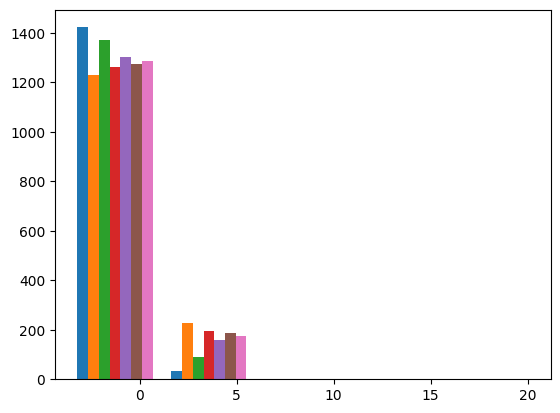

In [105]:
# Q2 :
selected_columns = ['LotArea', 'OverallQual', 'YearBuilt', '1stFlrSF', 'GrLivArea', 'GarageCars', 'GarageArea']
x = df[selected_columns]
y = df[['SalePrice' ]]
scaler = StandardScaler()
x_tf = scaler.fit_transform(x)

plt.hist(x_tf , bins = 5)
plt.show()

In [106]:
x_train, x_test, y_train, y_test = train_test_split(x_tf , y, train_size=0.8, random_state=42)
print(f'Data size = {len(df)}')
print(f'Train size = {len(x_train)}')
print(f'Test size = {len(x_test)}')

Data size = 1460
Train size = 1168
Test size = 292


In [107]:
M = LinearRegression()
y_pred = M.fit(x_train, y_train).predict(x_test)
print('MAE = ' , mean_absolute_error(y_test , y_pred))
print('MSE = ' , mean_squared_error(y_test , y_pred))
print('RMSE = ' , np.sqrt(mean_squared_error(y_test , y_pred)))
print(f'M.coef_ = {M.coef_}')
print(f'M.intercept_ = {M.intercept_}')

MAE =  25058.343629327985
MSE =  1608978441.379809
RMSE =  40112.07351134829
M.coef_ = [[ 6494.32712735 30867.15749185 10854.36243911  8854.74507802
  22180.97730392  7384.80196343  3678.79597374]]
M.intercept_ = [180081.85267315]


In [59]:
er = y_test - y_pred
er.describe()

,SalePrice
count,292.000000
mean,4204.331489
std,44135.423870
min,-111707.085969
25%,-19395.782493
50%,2145.188940
75%,20479.276749
max,299660.220548
